In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the year, month, and day of the current observation.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1833.742, BIC=1863.156, Fit time=1.806 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1968.534, BIC=1994.272, Fit time=0.536 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1869.586, BIC=1895.323, Fit time=1.254 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1835.178, BIC=1868.269, Fit time=1.968 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1991.156, BIC=2016.893, Fit time=0.721 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=0.297 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1837.533, BIC=1874.300, Fit time=4.312 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1816.137, BIC=1849.228, Fit time=1.818 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 236.998947958  Num NaN: 0'

'Test Error: 6.33249788567    Num NaN: 0'

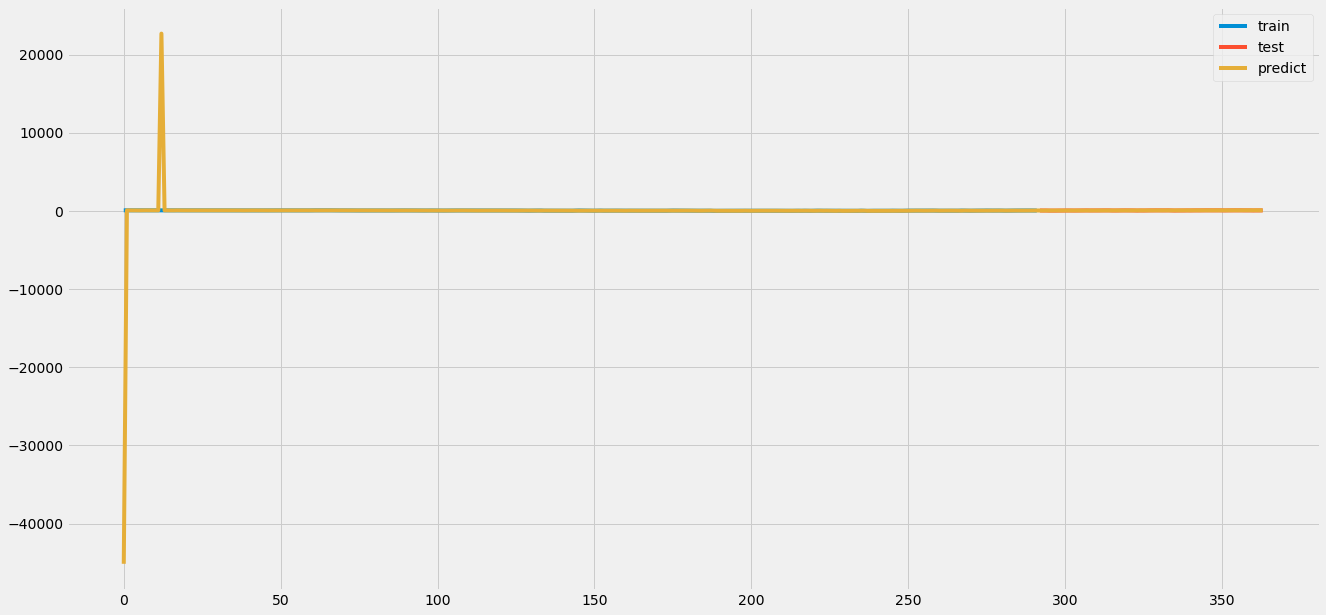

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 4.17465753425  Num NaN: 0'

'Test Error: 14.0527777778    Num NaN: 0'

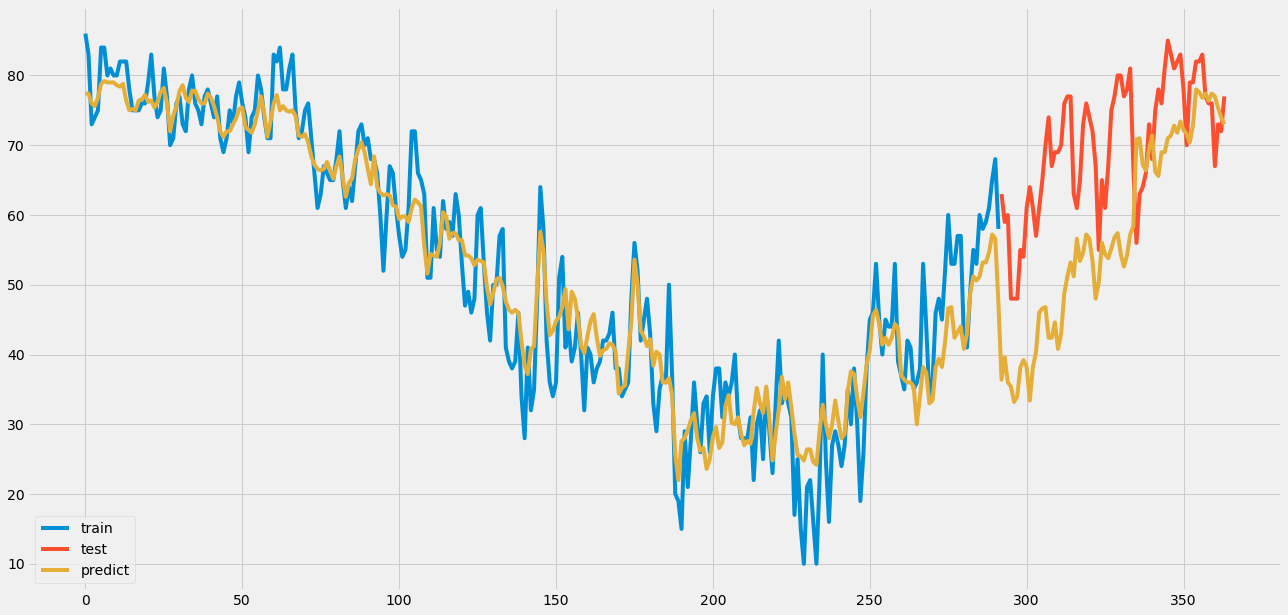

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 3.05578101319e+15  Num NaN: 0'

'Test Error: 3.056345463e+15    Num NaN: 0'

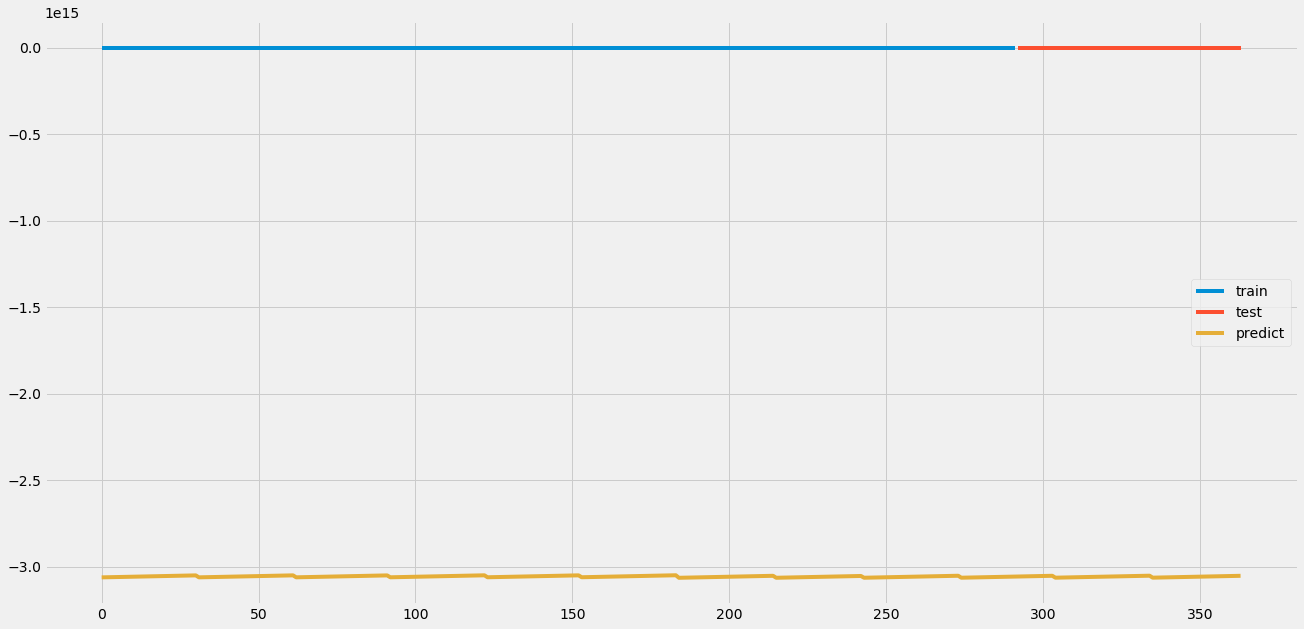

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 1.55616438356  Num NaN: 0'

'Test Error: 10.5763888889    Num NaN: 0'

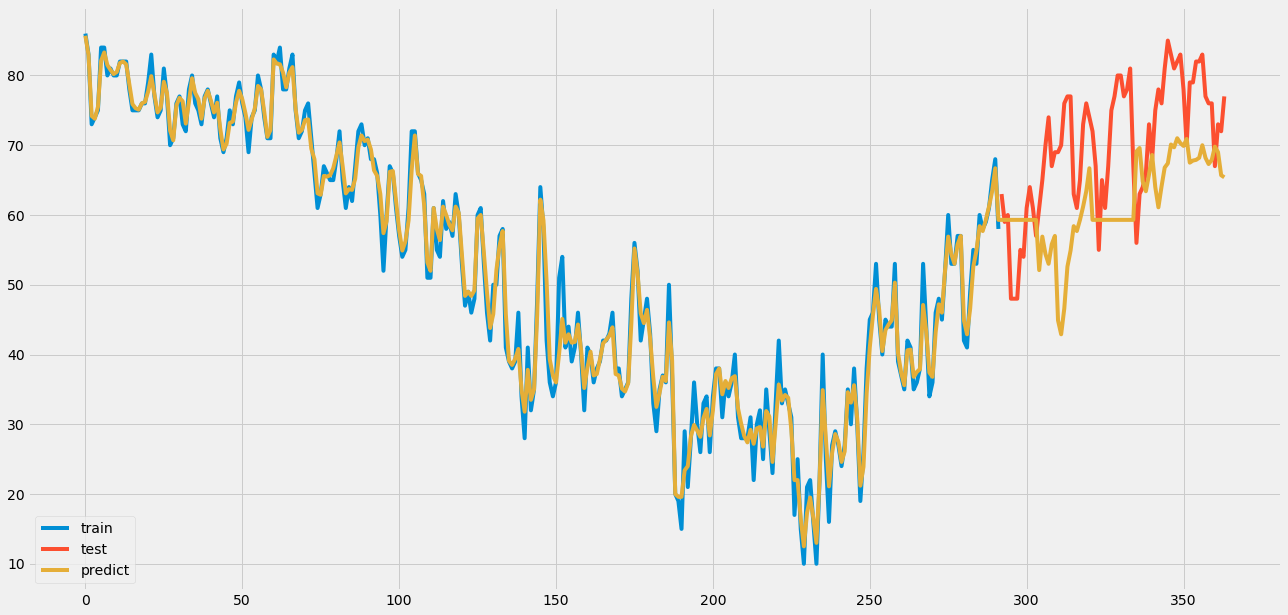

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 5.4694285975  Num NaN: 0'

'Test Error: 11.9315203089    Num NaN: 0'

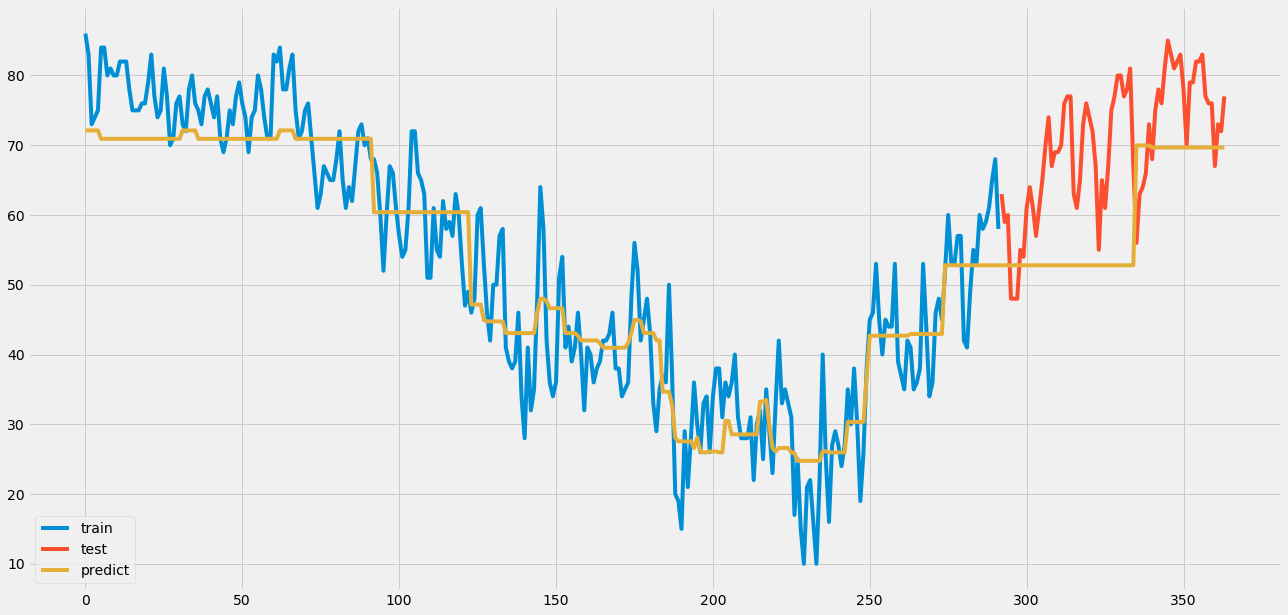

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 6.03709906419e-09  Num NaN: 0'

'Test Error: 40.8142523091    Num NaN: 0'

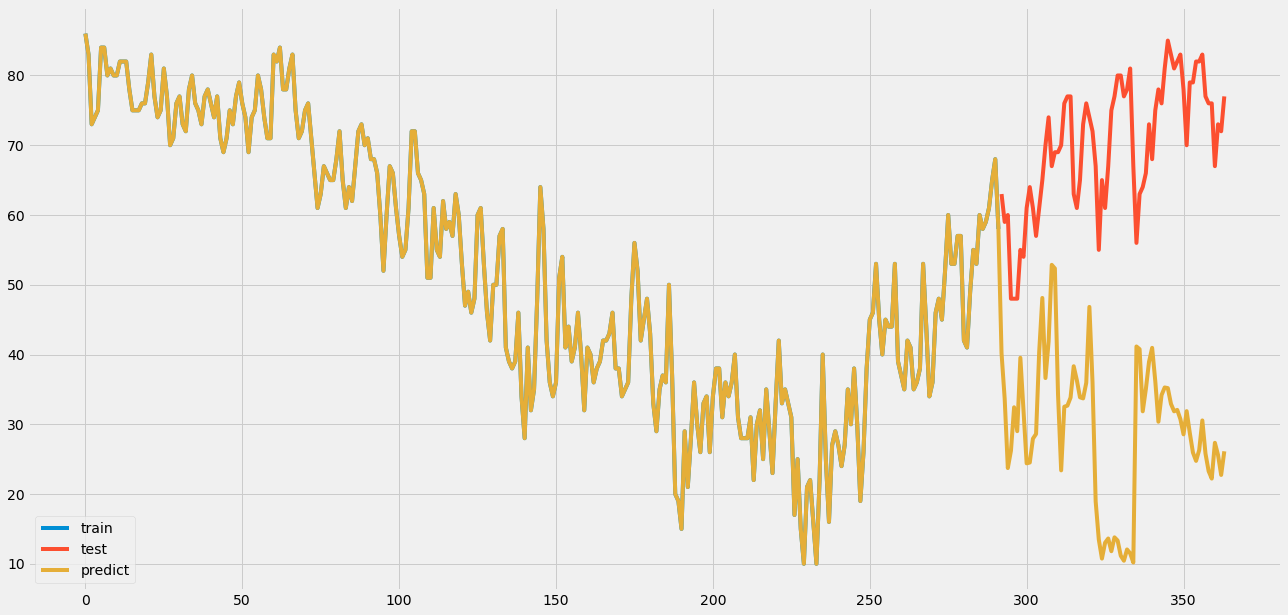

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 9.28226042808  Num NaN: 5'

'Test Error: 50.7158892487    Num NaN: 5'

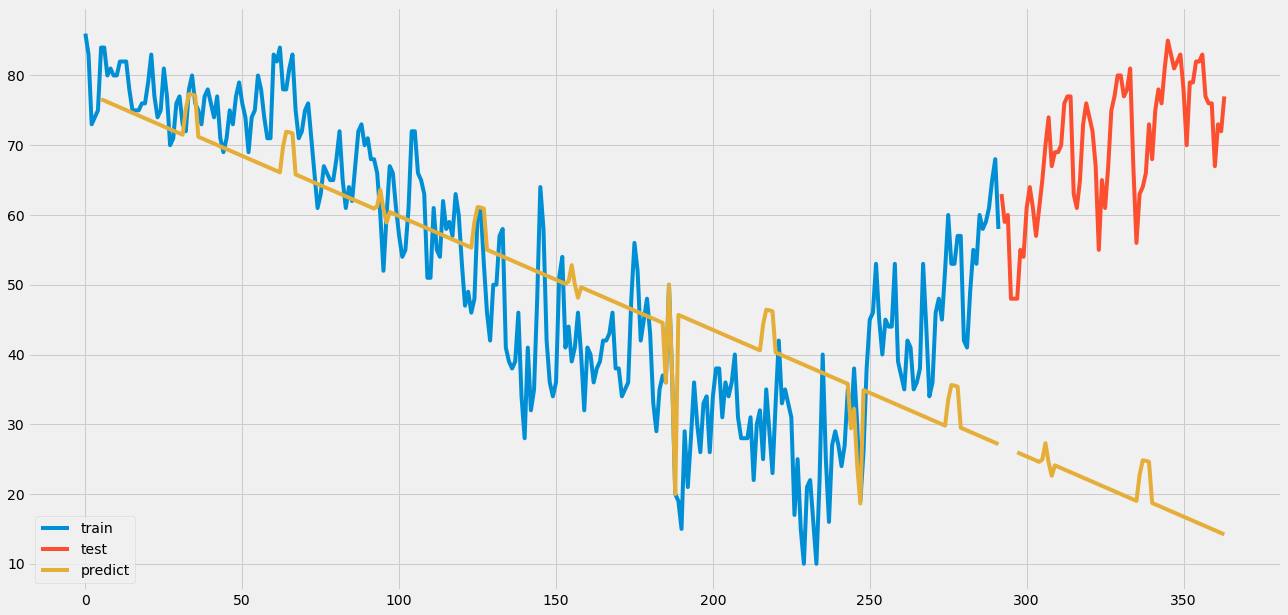

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.3404 - val_loss: 0.2348
Epoch 2/10
 - 0s - loss: 0.2240 - val_loss: 0.2994
Epoch 3/10
 - 0s - loss: 0.2224 - val_loss: 0.2498
Epoch 4/10
 - 0s - loss: 0.2229 - val_loss: 0.2482
Epoch 5/10
 - 0s - loss: 0.2225 - val_loss: 0.2985
Epoch 6/10
 - 0s - loss: 0.2232 - val_loss: 0.2839
Epoch 7/10
 - 0s - loss: 0.2244 - val_loss: 0.2739
Epoch 8/10
 - 0s - loss: 0.2240 - val_loss: 0.3160
Epoch 9/10
 - 0s - loss: 0.2205 - val_loss: 0.3158
Epoch 10/10
 - 0s - loss: 0.2221 - val_loss: 0.2440


'Train Error: 16.4934855072  Num NaN: 5'

'Test Error: 18.3009127717    Num NaN: 5'

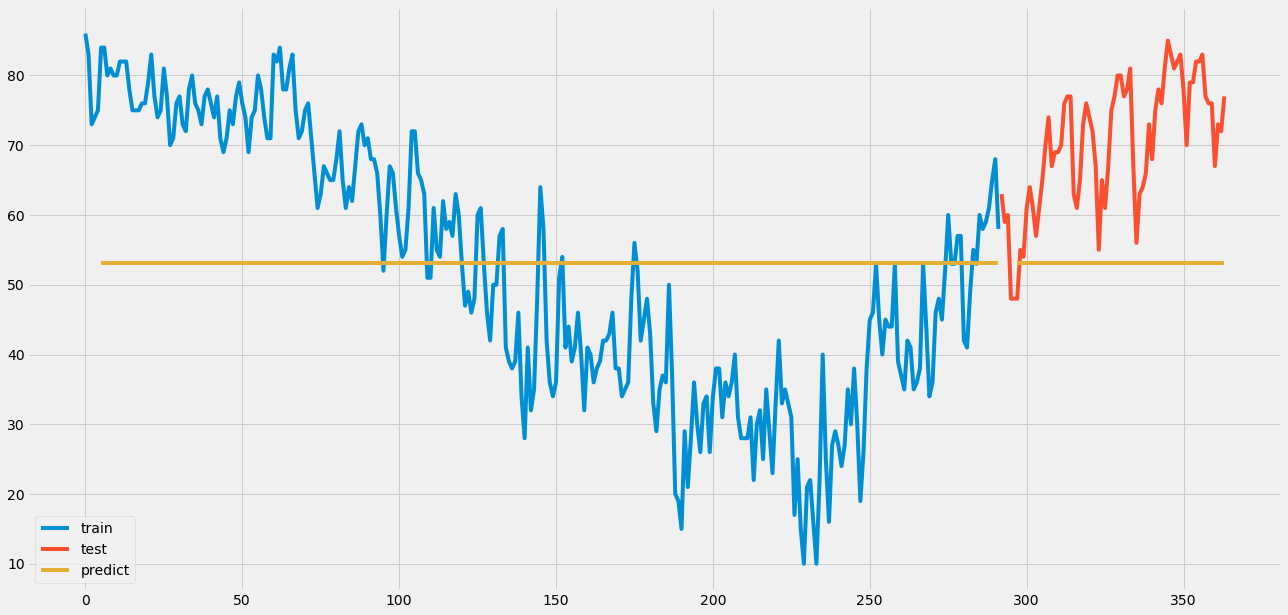

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2823 - val_loss: 0.3442
Epoch 2/10
 - 0s - loss: 0.2339 - val_loss: 0.4876
Epoch 3/10
 - 0s - loss: 0.2334 - val_loss: 0.1936
Epoch 4/10
 - 0s - loss: 0.2497 - val_loss: 0.3296
Epoch 5/10
 - 0s - loss: 0.2462 - val_loss: 0.3296
Epoch 6/10
 - 0s - loss: 0.2437 - val_loss: 0.3183
Epoch 7/10
 - 0s - loss: 0.2360 - val_loss: 0.3496
Epoch 8/10
 - 0s - loss: 0.2457 - val_loss: 0.2941
Epoch 9/10
 - 0s - loss: 0.2383 - val_loss: 0.1358
Epoch 10/10
 - 0s - loss: 0.2382 - val_loss: 0.1003


'Train Error: 20.9264564115  Num NaN: 5'

'Test Error: 7.5223236084    Num NaN: 5'

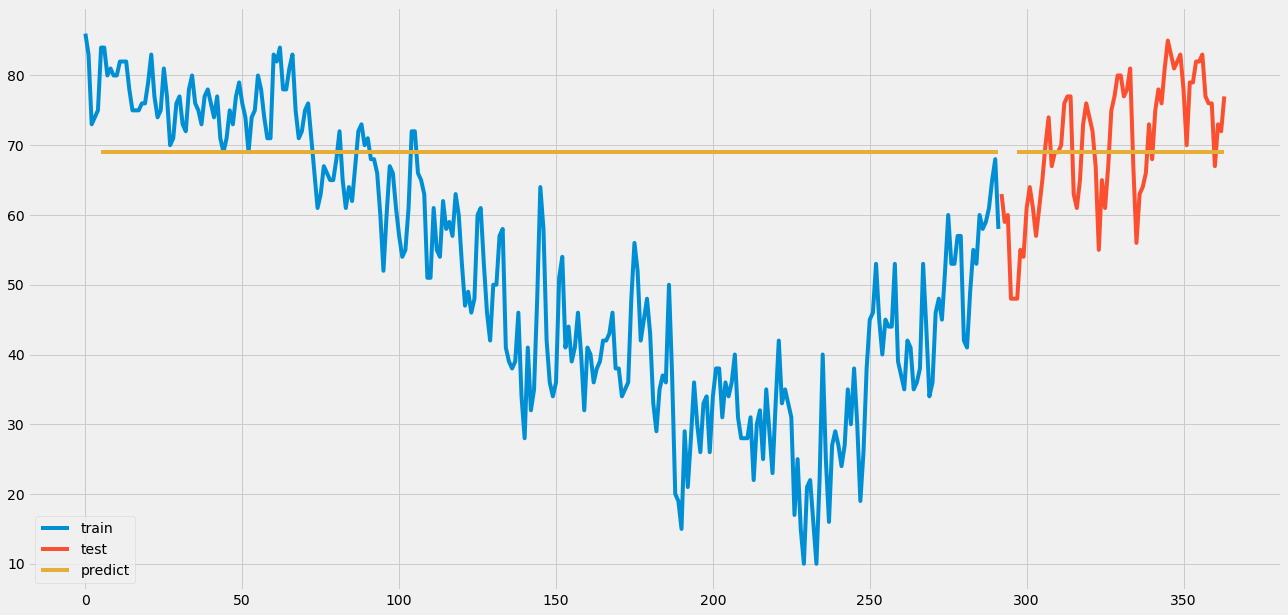

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.7309 - val_loss: 0.5667
Epoch 2/10
 - 0s - loss: 0.4944 - val_loss: 0.4095
Epoch 3/10
 - 0s - loss: 0.3629 - val_loss: 0.3081
Epoch 4/10
 - 0s - loss: 0.2748 - val_loss: 0.2358
Epoch 5/10
 - 0s - loss: 0.2106 - val_loss: 0.1819
Epoch 6/10
 - 0s - loss: 0.1624 - val_loss: 0.1411
Epoch 7/10
 - 0s - loss: 0.1258 - val_loss: 0.1099
Epoch 8/10
 - 0s - loss: 0.0976 - val_loss: 0.0857
Epoch 9/10
 - 0s - loss: 0.0758 - val_loss: 0.0669
Epoch 10/10
 - 0s - loss: 0.0587 - val_loss: 0.0523


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)